# Australian Forest Observatory Project

## Data Validation

### Overview

The Australian Forest Observatory Project (AFO) aims to use LIDAR and other remote sensing to produce the following key deliverables:

- near surface fuel height and cover
- elevated fuel height and cover
- canopy height and cover

This pilot is being conducted in three areas: Pilliga, Central coast, Snowy-Monaro

### Datasets
For each area (X) the following raster layers have been produced
- X-fuels-classes-2021-density.tif: fuel loads (t/ha) for litter, surface, elevated and bark
- X-vegetation-canopy_base_height-2021.tif: canopy height (m)
- X-vegetation-canopy_cover-2021.tif: canopy cover (%)
- X-vegetation-ladder_fuel_density-2021.tif: ladder fuel load (assumed to be t/ha)

Each pixel in the dataset is #TODO m.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show, show_hist

## Fuel Load (t/ha)

In [4]:
fuel_load_paths = {
    'pilliga': 'spatial_data/Pilliga-fuels-classes-2021-density.tif',
    'central': 'spatial_data/Centralcoast-fuels-classes-2021-density.tif',
    'snowy': 'spatial_data/Southmnts-fuels-classes-2021-density.tif',
}

fuel_loads = {}
strata = ['litter', 'surface', 'elevated', 'bark']

for loc, path in fuel_load_paths.items():
    with rasterio.open(path, 'r') as src:
        load_dict = {}
        for i, stratum in enumerate(strata):
            load_dict[stratum] = src.read(i+1) #GDAL indexed from 1
    fuel_loads[loc] = load_dict

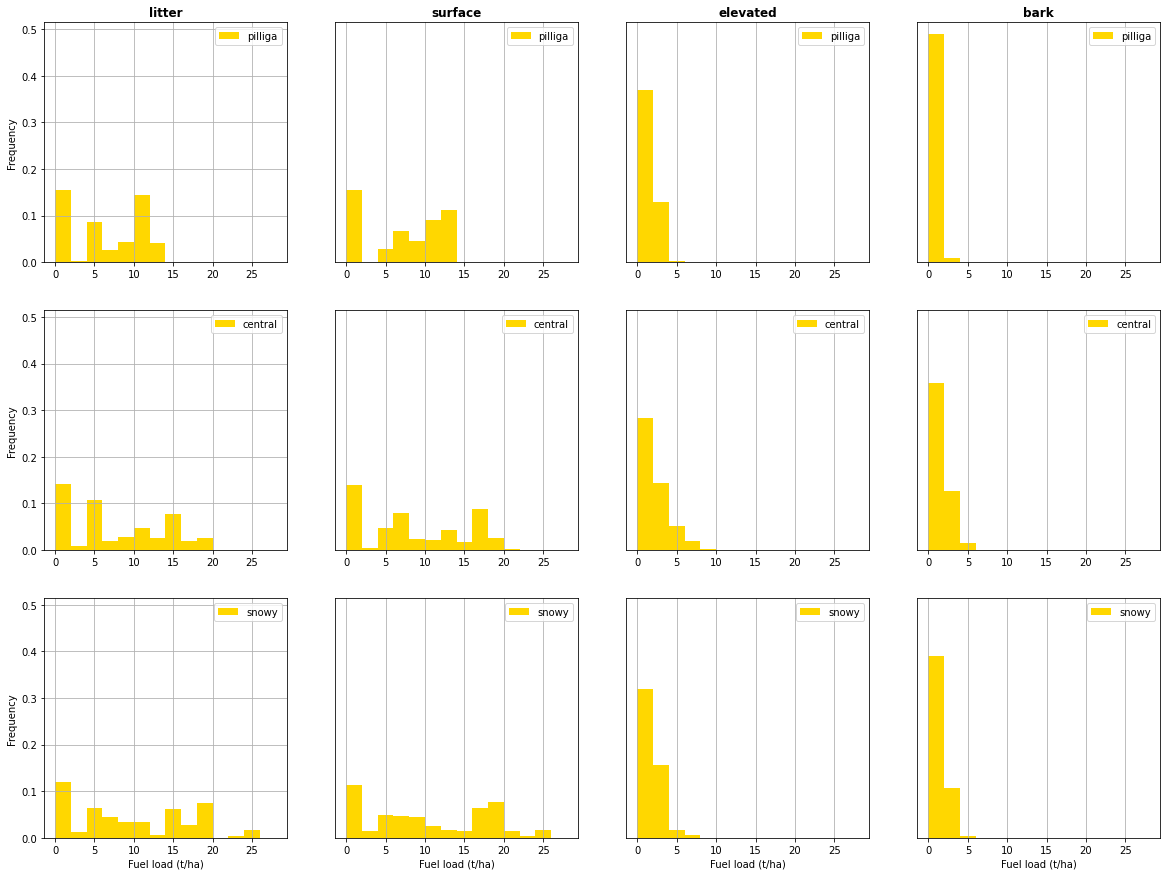

In [30]:
fig, axes = plt.subplots(len(fuel_loads), len(strata), sharey=True, figsize=(20,15))
for loc_id, (loc, strata) in enumerate(fuel_loads.items()):
    for stratum_id, (stratum, data) in enumerate(strata.items()):
        ax = axes[loc_id,stratum_id]
        show_hist(
            data,
            label=loc,
            title=stratum,
            ax=ax,
            density=True,
            bins=[x for x in range(0,30,2)]
        )
        ax.set_xlabel('Fuel load (t/ha)')
        if loc_id: ax.title.set_visible(False)
        if loc_id < (len(fuel_loads)-1): ax.xaxis.label.set_visible(False)
        if stratum_id: ax.yaxis.set_visible(False)
    
plt.show()

In [12]:
for loc_id, (loc, strata) in enumerate(fuel_loads.items()):
    for stratum_id, (stratum, data) in enumerate(strata.items()):
        np.place(data, data < 0, np.nan)


## Canopy Base Height (m)

In [14]:
cbh_paths = {
    'pilliga': 'spatial_data/Pilliga-vegetation-canopy_base_height-2021.tif',
    'central': 'spatial_data/Centralcoast-vegetation-canopy_base_height-2021.tif',
    'snowy': 'spatial_data/Southmnts-vegetation-canopy_base_height-2021.tif',
}

cbhs = {}

for loc, path in cbh_paths.items():
    with rasterio.open(path, 'r') as src:
        cbh = src.read()
    cbhs[loc] = cbh

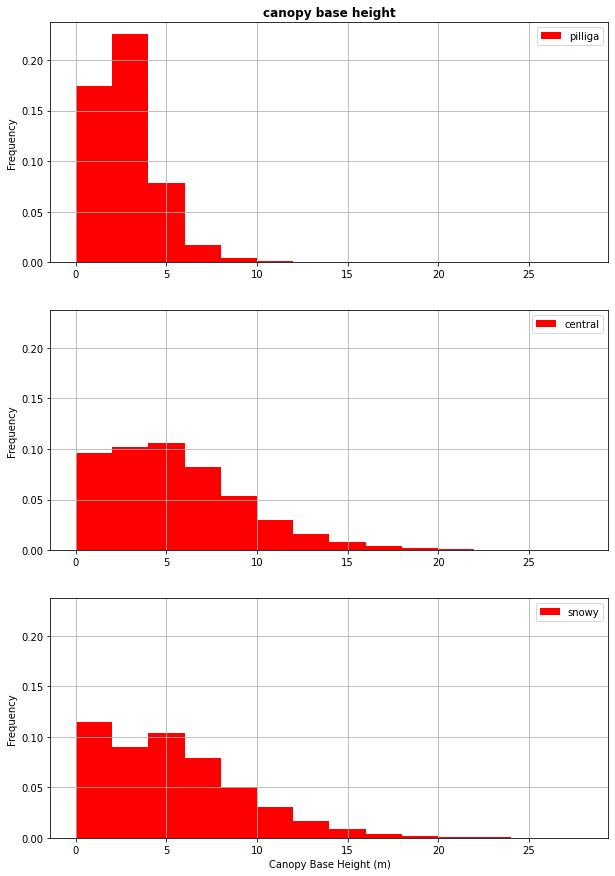

In [28]:
fig, axes = plt.subplots(len(cbhs), 1, sharey=True, figsize=(10,15))

for loc_id, (loc, cbh) in enumerate(cbhs.items()):
    ax = axes[loc_id]
    show_hist(
        cbh,
        label=loc,
        title='canopy base height',
        ax=ax,
        density=True,
        bins=[x for x in range(0,30,2)],
    )

    ax.set_xlabel('Canopy Base Height (m)')
    if loc_id: ax.title.set_visible(False)
    if loc_id < (len(cbhs)-1): ax.xaxis.label.set_visible(False)

plt.show()

In [21]:
for loc, cbh in cbhs.items():
    np.place(cbh, cbh < 0, np.nan)    
    np.place(cbh, cbh > 50, np.nan)

## Canopy Cover (%)

In [32]:
cc_paths = {
    'pilliga': 'spatial_data/Pilliga-vegetation-canopy_cover-2021.tif',
    'central': 'spatial_data/Centralcoast-vegetation-canopy_cover-2021.tif',
    'snowy': 'spatial_data/Southmnts-vegetation-canopy_cover-2021.tif',
}

ccs = {}

for loc, path in cc_paths.items():
    with rasterio.open(path, 'r') as src:
        cc = src.read()
    ccs[loc] = cc

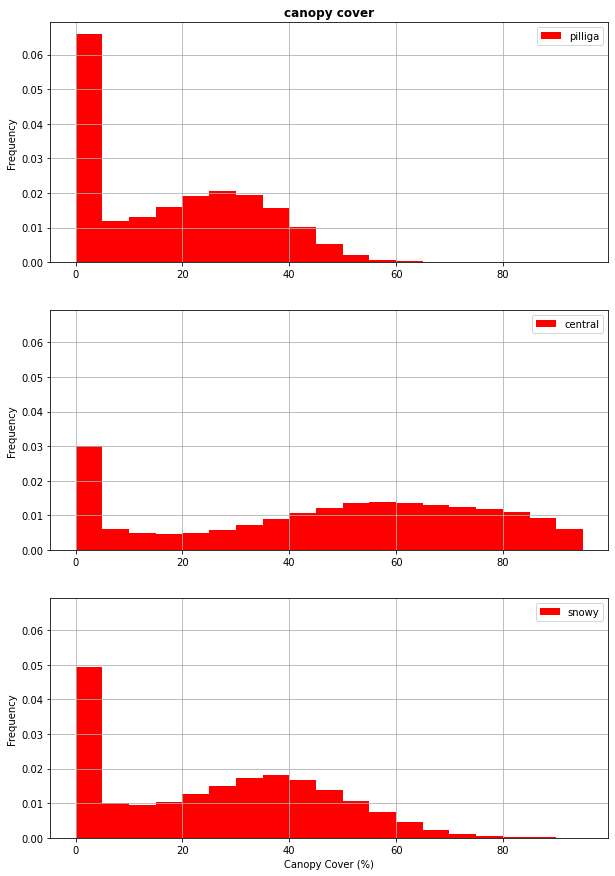

In [36]:
fig, axes = plt.subplots(len(ccs), 1, sharey=True, figsize=(10,15))

for loc_id, (loc, cc) in enumerate(ccs.items()):
    ax = axes[loc_id]
    show_hist(
        cc,
        label=loc,
        title='canopy cover',
        ax=ax,
        density=True,
        bins=[x for x in range(0,100,5)],
    )

    ax.set_xlabel('Canopy Cover (%)')
    if loc_id: ax.title.set_visible(False)
    if loc_id < (len(ccs)-1): ax.xaxis.label.set_visible(False)

plt.show()

In [35]:
for loc, cc in ccs.items():
    np.place(cc, cc < 0, np.nan)    
    np.place(cc, cc > 100, np.nan)

## Canopy Height (m)

In [37]:
ch_paths = {
    'pilliga': 'spatial_data/Pilliga-vegetation-canopy_height-2021.tif',
    'central': 'spatial_data/Centralcoast-vegetation-canopy_height-2021.tif',
    'snowy': 'spatial_data/Southmnts-vegetation-canopy_height-2021.tif',
}

chs = {}

for loc, path in ch_paths.items():
    with rasterio.open(path, 'r') as src:
        ch = src.read()
    chs[loc] = ch

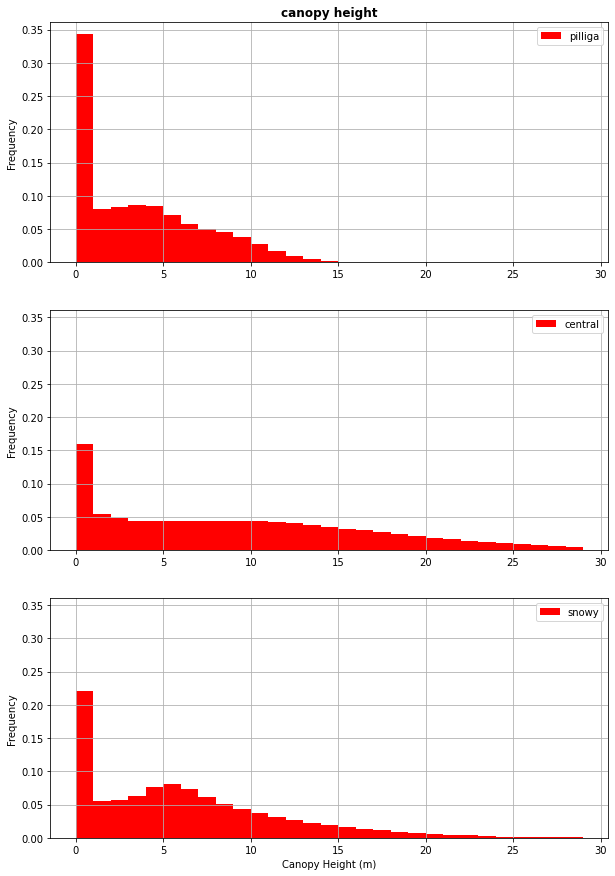

In [38]:
fig, axes = plt.subplots(len(chs), 1, sharey=True, figsize=(10,15))

for loc_id, (loc, ch) in enumerate(chs.items()):
    ax = axes[loc_id]
    show_hist(
        ch,
        label=loc,
        title='canopy height',
        ax=ax,
        density=True,
        bins=[x for x in range(0,30,1)],
    )

    ax.set_xlabel('Canopy Height (m)')
    if loc_id: ax.title.set_visible(False)
    if loc_id < (len(chs)-1): ax.xaxis.label.set_visible(False)

plt.show()

## Ladder Fuel Density

In [45]:
lfd_paths = {
    'pilliga': 'spatial_data/Pilliga-vegetation-ladder_fuel_density-2021.tif',
    'central': 'spatial_data/Centralcoast-vegetation-ladder_fuel_density-2021.tif',
    'snowy': 'spatial_data/Southmnts-vegetation-ladder_fuel_density-2021.tif',
}

lfds = {}

for loc, path in lfd_paths.items():
    with rasterio.open(path, 'r') as src:
        lfd = src.read()
    lfds[loc] = lfd

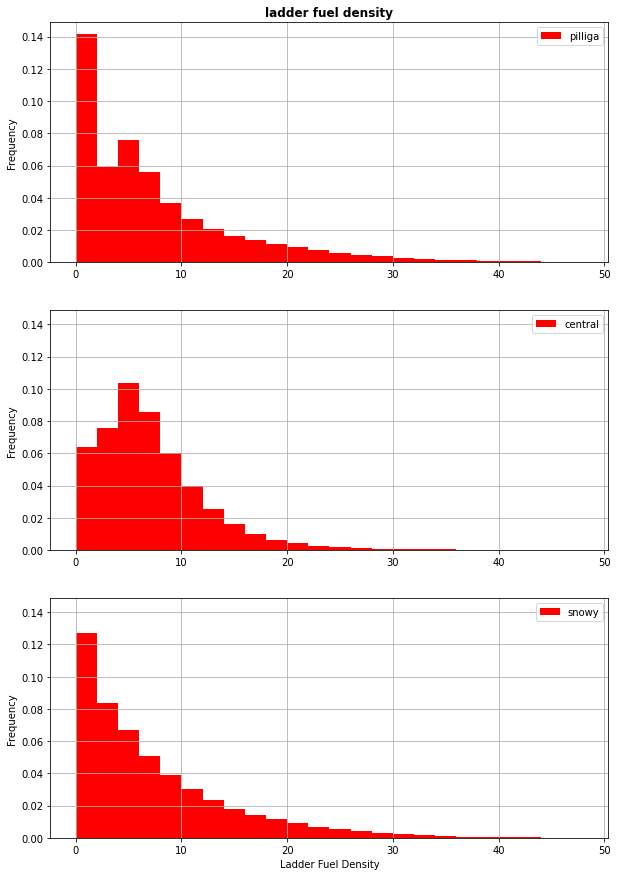

In [50]:
fig, axes = plt.subplots(len(lfds), 1, sharey=True, figsize=(10,15))

for loc_id, (loc, lfd) in enumerate(lfds.items()):
    ax = axes[loc_id]
    show_hist(
        lfd,
        label=loc,
        title='ladder fuel density',
        ax=ax,
        density=True,
        bins=[x for x in range(0,50,2)],
    )

    ax.set_xlabel('Ladder Fuel Density')
    if loc_id: ax.title.set_visible(False)
    if loc_id < (len(lfds)-1): ax.xaxis.label.set_visible(False)

plt.show()

In [48]:
for loc, lfd in lfds.items():
    np.place(lfd, lfd < 0, np.nan)    
    np.place(lfd, lfd > 100, np.nan)

In [57]:
for loc, lfd in lfds.items():
    print(loc)
    # print(lfd)
    print(np.nanmean(lfd), np.nanmedian(lfd), np.nanmax(lfd), np.nanmin(lfd))

pilliga
7.502439 5.283817 99.38718 7.5101852e-06
central
7.1685624 6.1454926 99.85039 0.0
snowy
7.2957735 5.105208 99.94853 1.6093254e-06
